<a href="https://colab.research.google.com/github/Laaliji/Image_processing_and_computer_vision_workshops/blob/main/color_perception_and_digital_image_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Color Perception and Digital Image Processing Lab
------------------------------------------------

Loading sample image...

Part 1: Color Representation
Visualizing RGB color cube...


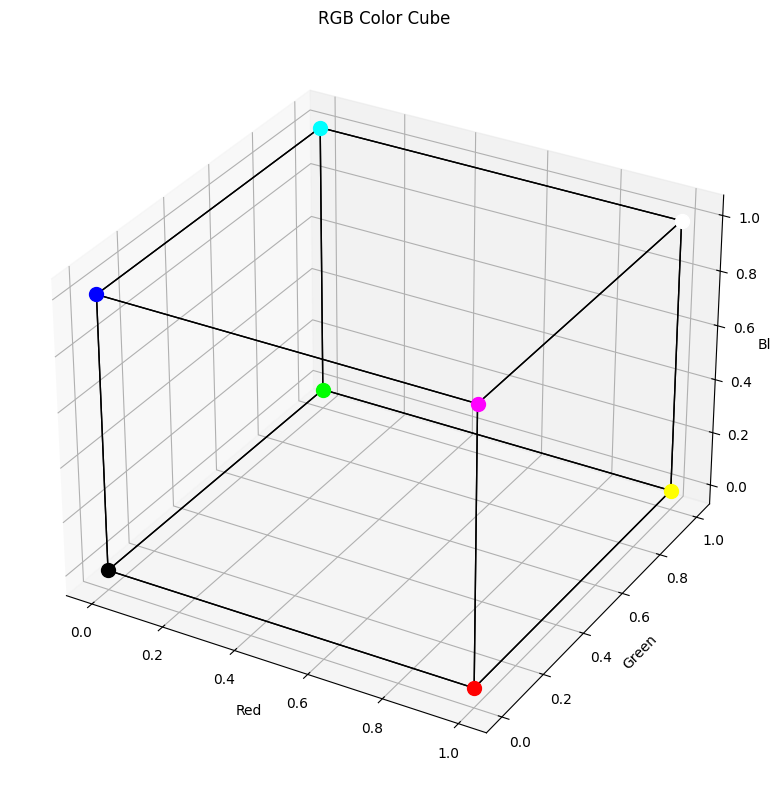


Visualizing color spaces (RGB, HSV, YUV)...


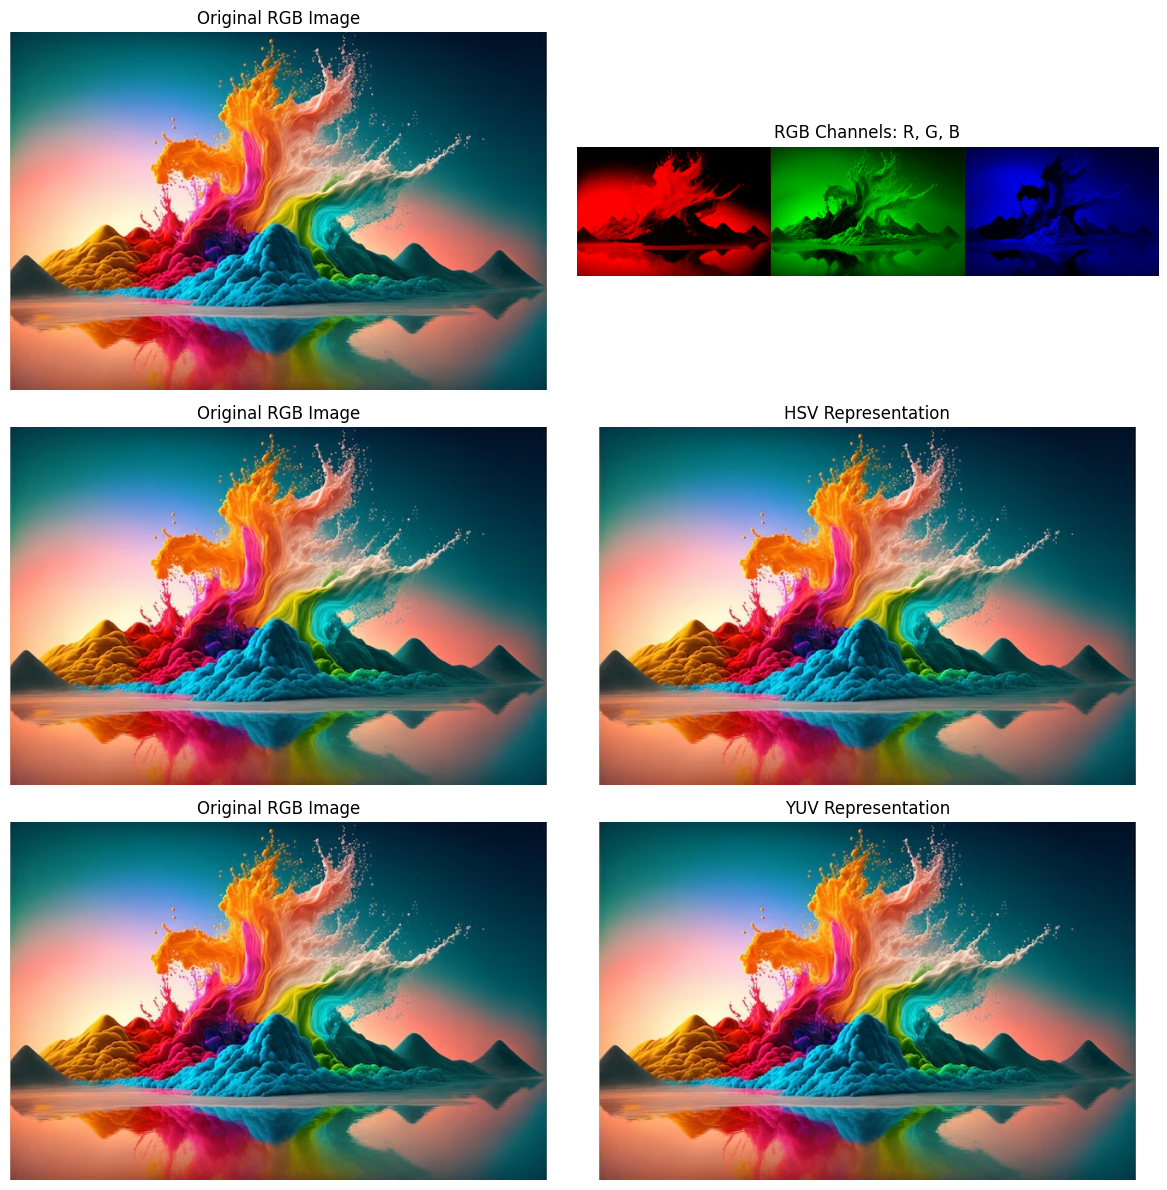

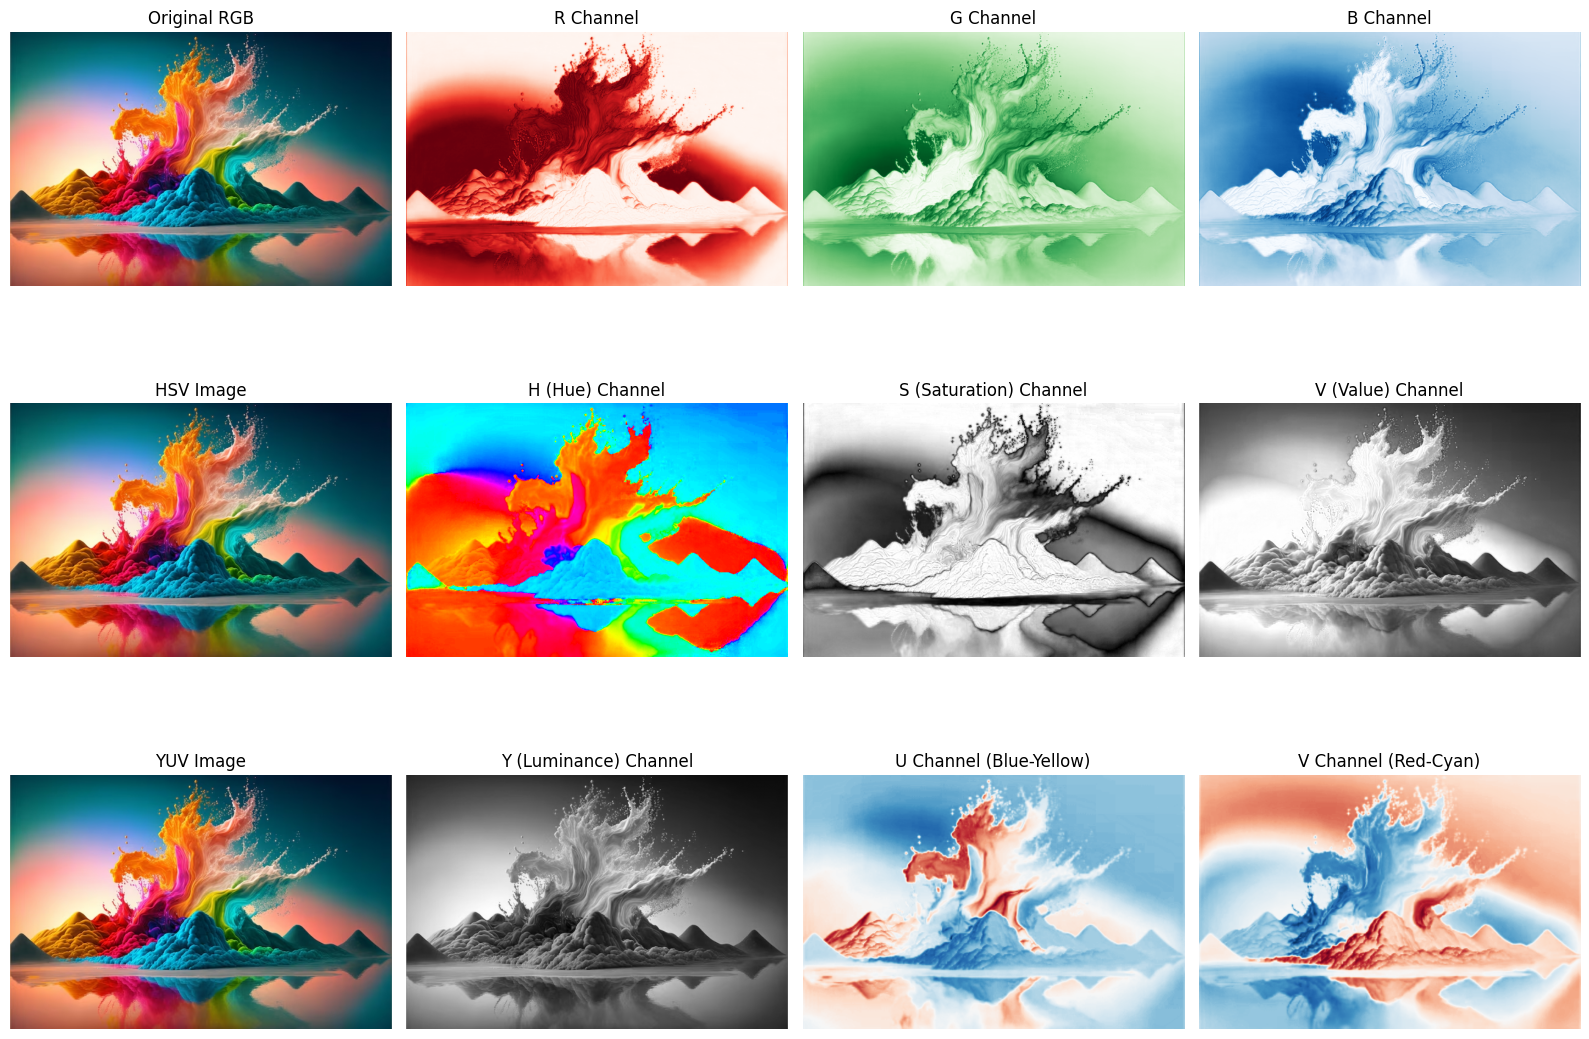


Part 2: Sampling and Quantization
Demonstrating image sampling...


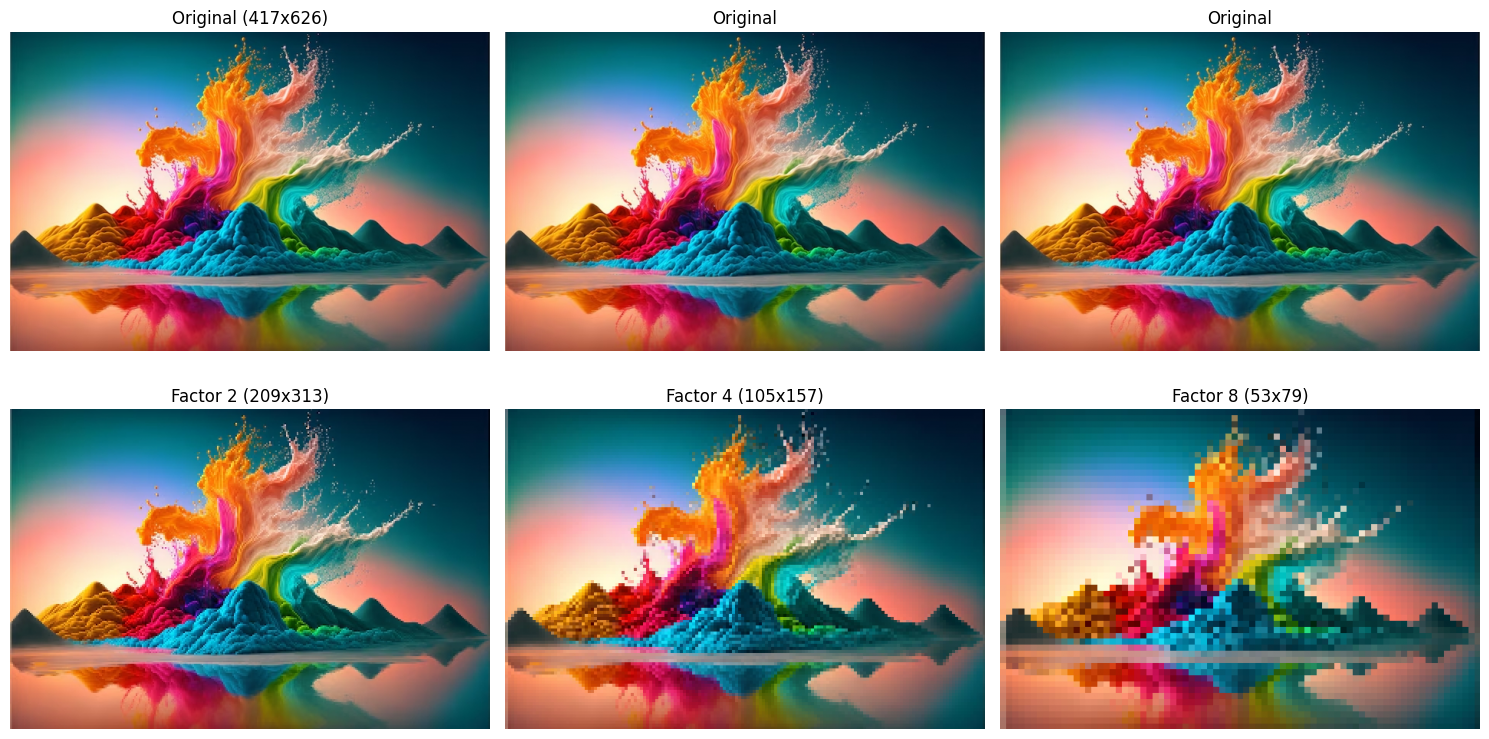

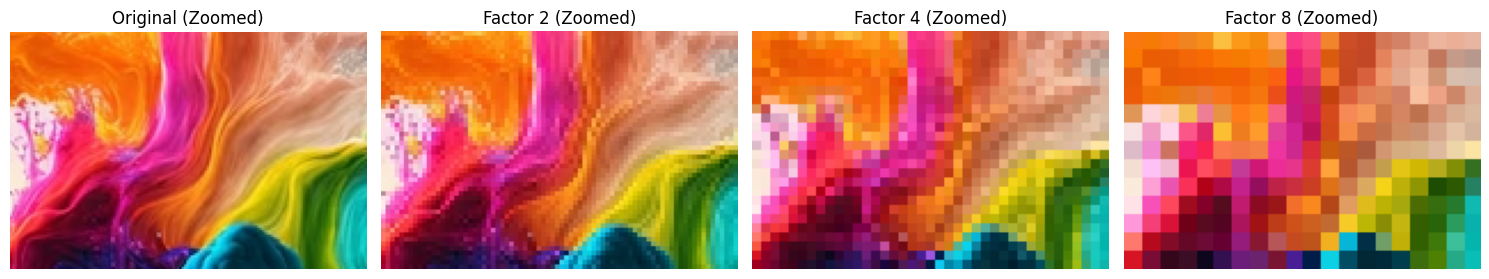


Demonstrating image quantization...


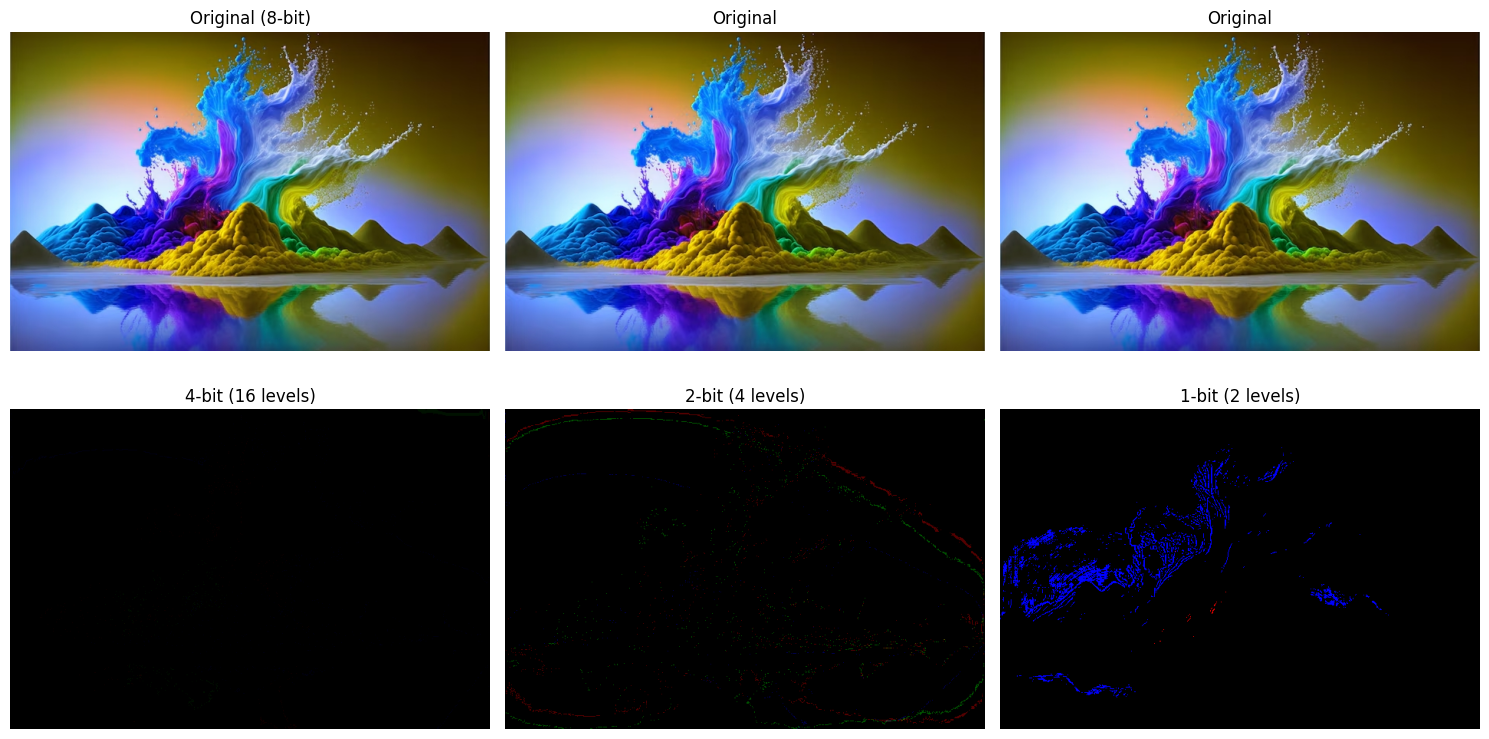


Part 3: Image Enhancement and Processing
Applying contrast enhancement...


<ipython-input-6-dae4087be728>:350: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[0, 2].hist((hsv_img[:,:,2] * 255).astype(np.uint8).flatten(), 256, [0, 256], color='gray')
<ipython-input-6-dae4087be728>:362: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1, 2].hist((hsv_img_eq[:,:,2] * 255).astype(np.uint8).flatten(), 256, [0, 256], color='gray')


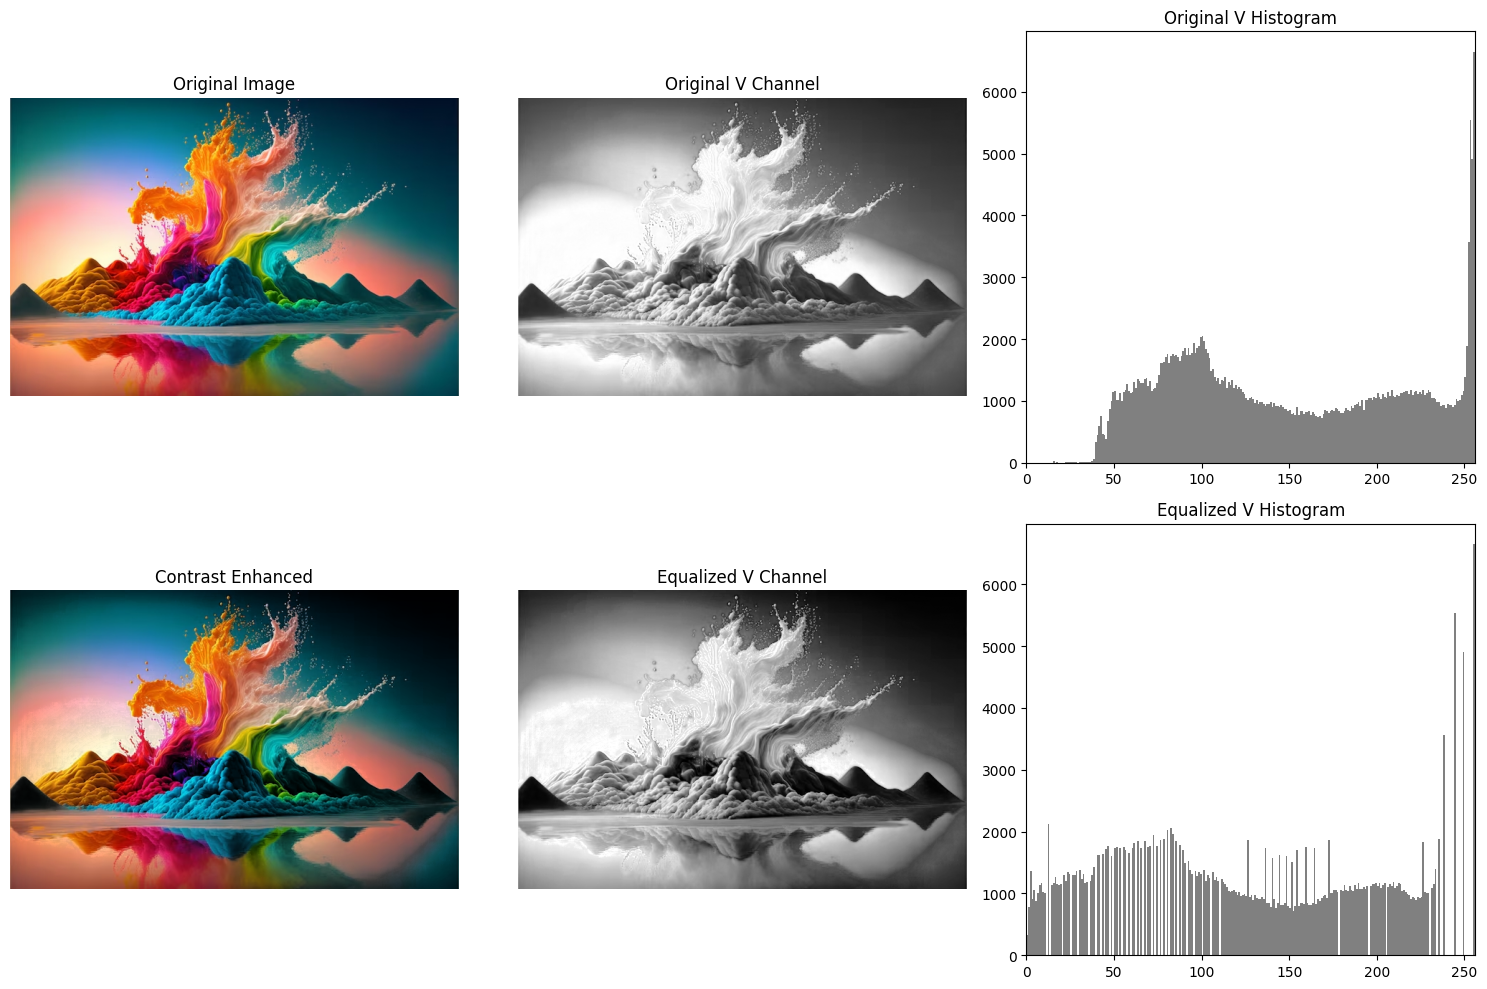


Applying various image filters...


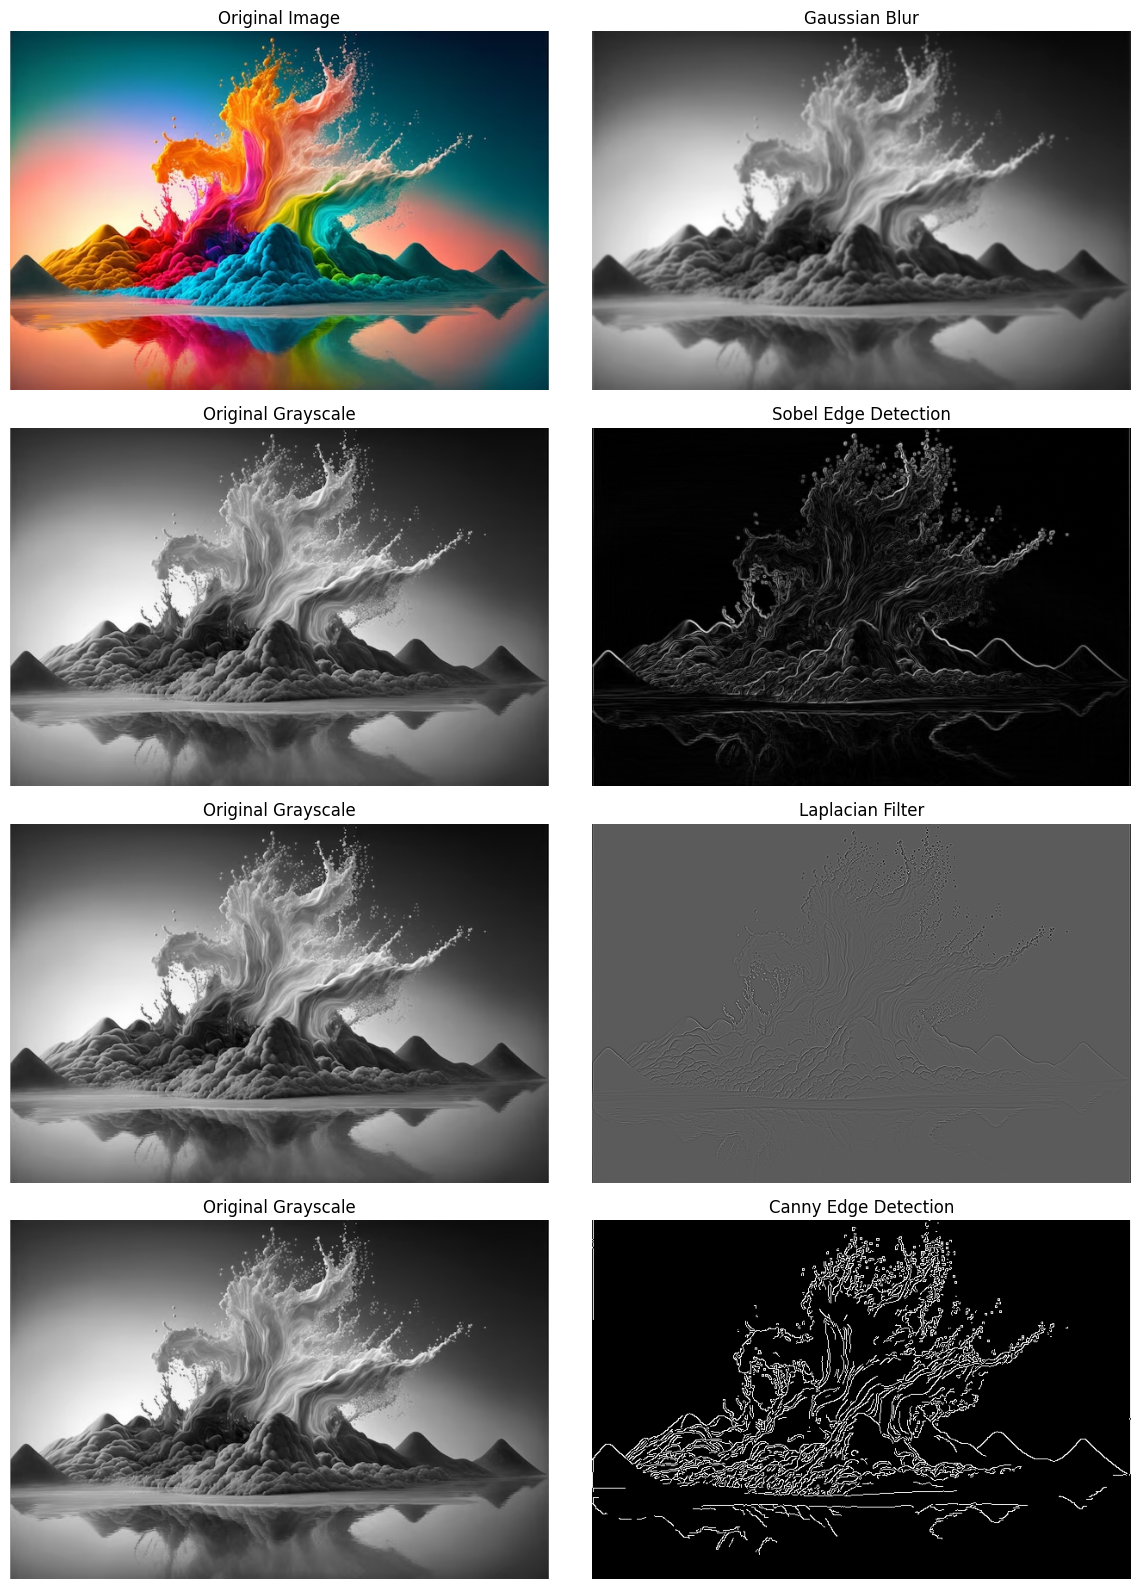

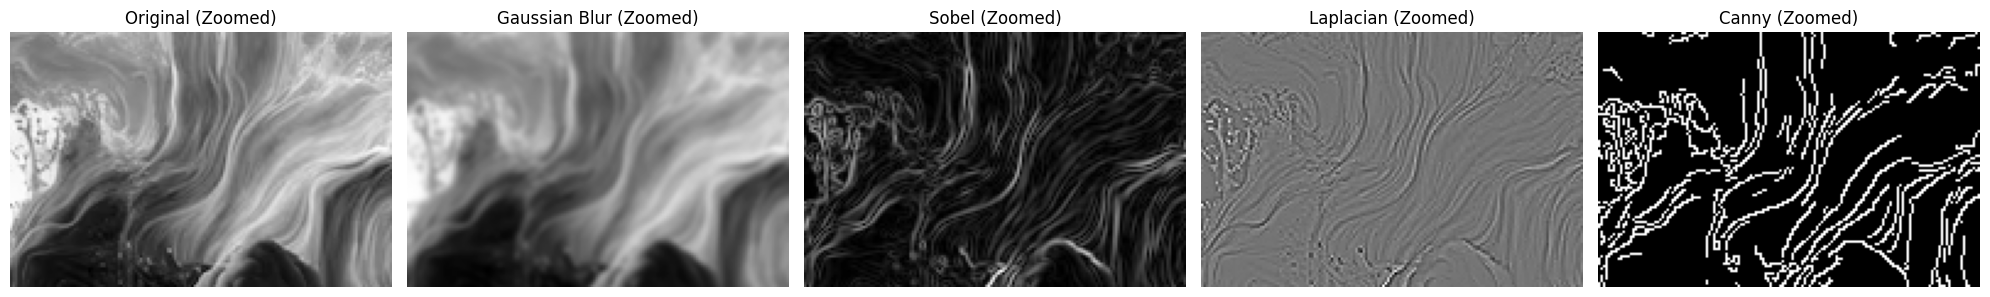


Lab Complete!
------------------------------------------------


In [6]:
"""
Lab: Color Perception and Digital Image Representation
Based on Chapter 2 of Image Processing & Computer Vision
With direct comparisons between original and processed images
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
import cv2

# Part 1: Color Representation and Conversion

def display_color_cube():
    """
    Visualize the RGB color cube structure
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    r = [0, 1]
    g = [0, 1]
    b = [0, 1]

    for R in r:
        for G in g:
            for B in b:
                ax.scatter(R, G, B, color=(R, G, B), s=100)

    for i, (R, G, B) in enumerate([(0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,1), (1,0,1), (1,1,1), (0,1,1)]):
        for j, (R2, G2, B2) in enumerate([(0,0,0), (1,0,0), (1,1,0), (0,1,0), (0,0,1), (1,0,1), (1,1,1), (0,1,1)]):
            if sum(abs(np.array([R,G,B]) - np.array([R2,G2,B2]))) == 1:
                ax.plot([R, R2], [G, G2], [B, B2], color='black', linestyle='-', linewidth=1)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('RGB Color Cube')

    plt.tight_layout()
    plt.show()

def rgb_to_yuv(rgb_image):
    """
    Convert RGB image to YUV color space
    """
    convert_matrix = np.array([
        [0.299, 0.587, 0.114],
        [-0.147, -0.289, 0.436],
        [0.615, -0.515, -0.100]
    ])

    h, w, c = rgb_image.shape
    rgb_flat = rgb_image.reshape(h*w, c)
    yuv_flat = np.dot(rgb_flat, convert_matrix.T)
    yuv_image = yuv_flat.reshape(h, w, c)
    return yuv_image

def yuv_to_rgb(yuv_image):
    """
    Convert YUV image to RGB color space
    """
    convert_matrix = np.array([
        [1.0, 0.0, 1.140],
        [1.0, -0.395, -0.581],
        [1.0, 2.032, 0.0]
    ])

    h, w, c = yuv_image.shape
    yuv_flat = yuv_image.reshape(h*w, c)
    rgb_flat = np.dot(yuv_flat, convert_matrix.T)
    rgb_flat = np.clip(rgb_flat, 0, 1)
    rgb_image = rgb_flat.reshape(h, w, c)
    return rgb_image

def visualize_color_spaces(image):
    """
    Visualize an image in different color spaces: RGB, HSV, and YUV
    With side-by-side comparisons
    """
    if image.max() > 1.0:
        image = image / 255.0

    hsv_image = rgb_to_hsv(image)
    yuv_image = rgb_to_yuv(image)

    hsv_visual = hsv_to_rgb(hsv_image)
    yuv_visual = yuv_to_rgb(yuv_image)

    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    axs[0, 0].imshow(image)
    axs[0, 0].set_title('Original RGB Image')
    axs[0, 0].axis('off')

    rgb_viz = np.hstack([
        np.stack([image[:,:,0], np.zeros_like(image[:,:,0]), np.zeros_like(image[:,:,0])], axis=2),
        np.stack([np.zeros_like(image[:,:,1]), image[:,:,1], np.zeros_like(image[:,:,1])], axis=2),
        np.stack([np.zeros_like(image[:,:,2]), np.zeros_like(image[:,:,2]), image[:,:,2]], axis=2)
    ])

    axs[0, 1].imshow(rgb_viz)
    axs[0, 1].set_title('RGB Channels: R, G, B')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(image)
    axs[1, 0].set_title('Original RGB Image')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(hsv_visual)
    axs[1, 1].set_title('HSV Representation')
    axs[1, 1].axis('off')

    axs[2, 0].imshow(image)
    axs[2, 0].set_title('Original RGB Image')
    axs[2, 0].axis('off')

    axs[2, 1].imshow(yuv_visual)
    axs[2, 1].set_title('YUV Representation')
    axs[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(3, 4, figsize=(16, 12))

    axs[0, 0].imshow(image)
    axs[0, 0].set_title('Original RGB')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(image[:,:,0], cmap='Reds')
    axs[0, 1].set_title('R Channel')
    axs[0, 1].axis('off')

    axs[0, 2].imshow(image[:,:,1], cmap='Greens')
    axs[0, 2].set_title('G Channel')
    axs[0, 2].axis('off')

    axs[0, 3].imshow(image[:,:,2], cmap='Blues')
    axs[0, 3].set_title('B Channel')
    axs[0, 3].axis('off')

    axs[1, 0].imshow(hsv_visual)
    axs[1, 0].set_title('HSV Image')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(hsv_image[:,:,0], cmap='hsv')
    axs[1, 1].set_title('H (Hue) Channel')
    axs[1, 1].axis('off')

    axs[1, 2].imshow(hsv_image[:,:,1], cmap='gray')
    axs[1, 2].set_title('S (Saturation) Channel')
    axs[1, 2].axis('off')

    axs[1, 3].imshow(hsv_image[:,:,2], cmap='gray')
    axs[1, 3].set_title('V (Value) Channel')
    axs[1, 3].axis('off')

    axs[2, 0].imshow(yuv_visual)
    axs[2, 0].set_title('YUV Image')
    axs[2, 0].axis('off')

    axs[2, 1].imshow(yuv_image[:,:,0], cmap='gray')
    axs[2, 1].set_title('Y (Luminance) Channel')
    axs[2, 1].axis('off')

    axs[2, 2].imshow(yuv_image[:,:,1], cmap='RdBu')
    axs[2, 2].set_title('U Channel (Blue-Yellow)')
    axs[2, 2].axis('off')

    axs[2, 3].imshow(yuv_image[:,:,2], cmap='RdBu')
    axs[2, 3].set_title('V Channel (Red-Cyan)')
    axs[2, 3].axis('off')

    plt.tight_layout()
    plt.show()

# Part 2: Image Sampling and Quantization

def demonstrate_sampling(image, sampling_factors):
    """
    Demonstrate the effect of sampling on image quality with clear comparisons
    """
    n_samples = len(sampling_factors)

    fig, axs = plt.subplots(2, n_samples, figsize=(15, 8))

    for i in range(n_samples):
        factor = sampling_factors[i]

        sampled = image[::factor, ::factor]
        h, w = image.shape[:2]
        upsampled = cv2.resize(sampled, (w, h), interpolation=cv2.INTER_NEAREST)

        if i == 0:
            axs[0, i].imshow(image)
            axs[0, i].set_title(f'Original ({image.shape[0]}x{image.shape[1]})')
            axs[0, i].axis('off')

            axs[1, i].imshow(upsampled)
            axs[1, i].set_title(f'Factor {factor} ({sampled.shape[0]}x{sampled.shape[1]})')
            axs[1, i].axis('off')
        else:
            axs[0, i].imshow(image)
            axs[0, i].set_title('Original')
            axs[0, i].axis('off')

            axs[1, i].imshow(upsampled)
            axs[1, i].set_title(f'Factor {factor} ({sampled.shape[0]}x{sampled.shape[1]})')
            axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, n_samples+1, figsize=(15, 5))

    h, w = image.shape[:2]
    region_h, region_w = h//4, w//4
    y_start, x_start = h//3, w//3
    region = image[y_start:y_start+region_h, x_start:x_start+region_w]

    axs[0].imshow(region)
    axs[0].set_title('Original (Zoomed)')
    axs[0].axis('off')

    for i, factor in enumerate(sampling_factors):
        sampled_region = region[::factor, ::factor]
        upsampled_region = cv2.resize(sampled_region, (region_w, region_h), interpolation=cv2.INTER_NEAREST)

        axs[i+1].imshow(upsampled_region)
        axs[i+1].set_title(f'Factor {factor} (Zoomed)')
        axs[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def demonstrate_quantization(image, num_bits_list):
    """
    Demonstrate the effect of quantization on image quality with side-by-side comparisons
    """
    if image.max() <= 1.0:
        image = (image * 255).astype(np.uint8)

    n_samples = len(num_bits_list)

    if len(image.shape) == 2:
        display_img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        display_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if image.shape[2] == 3 else image

    fig, axs = plt.subplots(2, n_samples, figsize=(15, 8))

    for i in range(n_samples):
        bits = num_bits_list[i]
        levels = 2 ** bits

        if len(image.shape) == 3:
            quantized = np.zeros_like(image)
            for c in range(image.shape[2]):
                quantized[:,:,c] = np.floor(image[:,:,c] * (levels - 1) / 255) * (255 / (levels - 1))
        else:
            quantized = np.floor(image * (levels - 1) / 255) * (255 / (levels - 1))

        quantized = quantized.astype(np.uint8)

        if len(quantized.shape) == 2:
            quantized_display = cv2.cvtColor(quantized, cv2.COLOR_GRAY2RGB)
        else:
            quantized_display = cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB) if quantized.shape[2] == 3 else quantized

        if i == 0:
            axs[0, i].imshow(display_img)
            axs[0, i].set_title(f'Original (8-bit)')
            axs[0, i].axis('off')

            axs[1, i].imshow(quantized_display)
            axs[1, i].set_title(f'{bits}-bit ({levels} levels)')
            axs[1, i].axis('off')
        else:
            axs[0, i].imshow(display_img)
            axs[0, i].set_title('Original')
            axs[0, i].axis('off')

            axs[1, i].imshow(quantized_display)
            axs[1, i].set_title(f'{bits}-bit ({levels} levels)')
            axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

    if len(image.shape) == 2 or image.shape[2] == 1:
        fig, axs = plt.subplots(n_samples+1, 2, figsize=(12, 3*(n_samples+1)))

        axs[0, 0].imshow(display_img)
        axs[0, 0].set_title('Original Image (8-bit)')
        axs[0, 0].axis('off')

        axs[0, 1].hist(image.flatten(), 256, [0, 256], color='gray')
        axs[0, 1].set_title('Original Histogram')
        axs[0, 1].set_xlim([0, 256])

        for i, bits in enumerate(num_bits_list):
            levels = 2 ** bits
            quantized = np.floor(image * (levels - 1) / 255) * (255 / (levels - 1))
            quantized = quantized.astype(np.uint8)

            if len(quantized.shape) == 2:
                quantized_display = cv2.cvtColor(quantized, cv2.COLOR_GRAY2RGB)
            else:
                quantized_display = cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB) if quantized.shape[2] == 3 else quantized

            axs[i+1, 0].imshow(quantized_display)
            axs[i+1, 0].set_title(f'{bits}-bit ({levels} levels)')
            axs[i+1, 0].axis('off')

            axs[i+1, 1].hist(quantized.flatten(), 256, [0, 256], color='gray')
            axs[i+1, 1].set_title(f'{bits}-bit Histogram')
            axs[i+1, 1].set_xlim([0, 256])

        plt.tight_layout()
        plt.show()

# Part 3: Image Enhancement and Processing

def enhance_contrast(image):
    """
    Enhance image contrast using histogram equalization with comparison
    """
    if len(image.shape) == 3:
        if image.max() > 1.0:
            image = image / 255.0

        hsv_img = rgb_to_hsv(image)
        v_channel = (hsv_img[:,:,2] * 255).astype(np.uint8)
        v_equalized = cv2.equalizeHist(v_channel) / 255.0
        hsv_img_eq = hsv_img.copy()
        hsv_img_eq[:,:,2] = v_equalized
        result = hsv_to_rgb(hsv_img_eq)

        fig, axs = plt.subplots(2, 3, figsize=(15, 10))

        axs[0, 0].imshow(image)
        axs[0, 0].set_title("Original Image")
        axs[0, 0].axis('off')

        axs[0, 1].imshow(hsv_img[:,:,2], cmap='gray')
        axs[0, 1].set_title("Original V Channel")
        axs[0, 1].axis('off')

        axs[0, 2].hist((hsv_img[:,:,2] * 255).astype(np.uint8).flatten(), 256, [0, 256], color='gray')
        axs[0, 2].set_title("Original V Histogram")
        axs[0, 2].set_xlim([0, 256])

        axs[1, 0].imshow(result)
        axs[1, 0].set_title("Contrast Enhanced")
        axs[1, 0].axis('off')

        axs[1, 1].imshow(hsv_img_eq[:,:,2], cmap='gray')
        axs[1, 1].set_title("Equalized V Channel")
        axs[1, 1].axis('off')

        axs[1, 2].hist((hsv_img_eq[:,:,2] * 255).astype(np.uint8).flatten(), 256, [0, 256], color='gray')
        axs[1, 2].set_title("Equalized V Histogram")
        axs[1, 2].set_xlim([0, 256])

        plt.tight_layout()
        plt.show()

    else:
        if image.max() <= 1.0:
            image = (image * 255).astype(np.uint8)

        equalized = cv2.equalizeHist(image)

        fig, axs = plt.subplots(2, 2, figsize=(12, 10))

        axs[0, 0].imshow(image, cmap='gray')
        axs[0, 0].set_title("Original Image")
        axs[0, 0].axis('off')

        axs[0, 1].hist(image.flatten(), 256, [0, 256], color='gray')
        axs[0, 1].set_title("Original Histogram")
        axs[0, 1].set_xlim([0, 256])

        axs[1, 0].imshow(equalized, cmap='gray')
        axs[1, 0].set_title("Contrast Enhanced")
        axs[1, 0].axis('off')

        axs[1, 1].hist(equalized.flatten(), 256, [0, 256], color='gray')
        axs[1, 1].set_title("Equalized Histogram")
        axs[1, 1].set_xlim([0, 256])

        plt.tight_layout()
        plt.show()

        result = equalized / 255.0

    return result

def apply_filters(image):
    """
    Apply different filters to an image and display results with comparisons to original
    """
    if image.max() <= 1.0:
        image = (image * 255).astype(np.uint8)

    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        display_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    else:
        gray_image = image
        display_img = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

    gaussian = cv2.GaussianBlur(gray_image, (5, 5), 0)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    canny = cv2.Canny(gray_image, 100, 200)

    fig, axs = plt.subplots(4, 2, figsize=(12, 16))

    axs[0, 0].imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(gaussian, cmap='gray')
    axs[0, 1].set_title('Gaussian Blur')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(gray_image, cmap='gray')
    axs[1, 0].set_title('Original Grayscale')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(sobel, cmap='gray')
    axs[1, 1].set_title('Sobel Edge Detection')
    axs[1, 1].axis('off')

    axs[2, 0].imshow(gray_image, cmap='gray')
    axs[2, 0].set_title('Original Grayscale')
    axs[2, 0].axis('off')

    axs[2, 1].imshow(laplacian, cmap='gray')
    axs[2, 1].set_title('Laplacian Filter')
    axs[2, 1].axis('off')

    axs[3, 0].imshow(gray_image, cmap='gray')
    axs[3, 0].set_title('Original Grayscale')
    axs[3, 0].axis('off')

    axs[3, 1].imshow(canny, cmap='gray')
    axs[3, 1].set_title('Canny Edge Detection')
    axs[3, 1].axis('off')

    plt.tight_layout()
    plt.show()

    h, w = gray_image.shape
    region_h, region_w = h//4, w//4
    y_start, x_start = h//3, w//3

    region_orig = gray_image[y_start:y_start+region_h, x_start:x_start+region_w]
    region_gaussian = gaussian[y_start:y_start+region_h, x_start:x_start+region_w]
    region_sobel = sobel[y_start:y_start+region_h, x_start:x_start+region_w]
    region_laplacian = laplacian[y_start:y_start+region_h, x_start:x_start+region_w]
    region_canny = canny[y_start:y_start+region_h, x_start:x_start+region_w]

    fig, axs = plt.subplots(1, 5, figsize=(20, 4))

    axs[0].imshow(region_orig, cmap='gray')
    axs[0].set_title('Original (Zoomed)')
    axs[0].axis('off')

    axs[1].imshow(region_gaussian, cmap='gray')
    axs[1].set_title('Gaussian Blur (Zoomed)')
    axs[1].axis('off')

    axs[2].imshow(region_sobel, cmap='gray')
    axs[2].set_title('Sobel (Zoomed)')
    axs[2].axis('off')

    axs[3].imshow(region_laplacian, cmap='gray')
    axs[3].set_title('Laplacian (Zoomed)')
    axs[3].axis('off')

    axs[4].imshow(region_canny, cmap='gray')
    axs[4].set_title('Canny (Zoomed)')
    axs[4].axis('off')

    plt.tight_layout()
    plt.show()

# Part 4: Main Lab Execution

def run_complete_lab():
    """
    Run the complete lab with all demonstrations
    """
    print("Color Perception and Digital Image Processing Lab")
    print("------------------------------------------------")

    print("\nLoading sample image...")
    try:
        img = plt.imread('img.jpg')
        if img.max() > 1.0:
            img = img / 255.0
    except:
        print("Error loading img.jpg. Creating test pattern...")
        img = np.zeros((300, 400, 3), dtype=np.float32)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                img[i, j, 0] = i / img.shape[0]
                img[i, j, 1] = j / img.shape[1]
                img[i, j, 2] = 0.5

    print("\nPart 1: Color Representation")
    print("Visualizing RGB color cube...")
    display_color_cube()

    print("\nVisualizing color spaces (RGB, HSV, YUV)...")
    visualize_color_spaces(img)

    print("\nPart 2: Sampling and Quantization")
    print("Demonstrating image sampling...")
    sampling_factors = [2, 4, 8]
    demonstrate_sampling(img, sampling_factors)

    print("\nDemonstrating image quantization...")
    quantization_bits = [4, 2, 1]
    demonstrate_quantization(img, quantization_bits)

    print("\nPart 3: Image Enhancement and Processing")
    print("Applying contrast enhancement...")
    enhanced_img = enhance_contrast(img)

    print("\nApplying various image filters...")
    apply_filters(img)

    print("\nLab Complete!")
    print("------------------------------------------------")

def analyze_color_distribution(image):
    """
    Analyze and visualize the color distribution in different color spaces
    """
    if image.max() > 1.0:
        image = image / 255.0

    hsv_img = rgb_to_hsv(image)
    yuv_img = rgb_to_yuv(image)

    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(131, projection='3d')
    r, g, b = image[..., 0].flatten(), image[..., 1].flatten(), image[..., 2].flatten()
    ax1.scatter(r, g, b, c=image.reshape(-1, 3), s=1)
    ax1.set_xlabel('Red')
    ax1.set_ylabel('Green')
    ax1.set_zlabel('Blue')
    ax1.set_title('RGB Distribution')

    ax2 = fig.add_subplot(132, projection='3d')
    h, s, v = hsv_img[..., 0].flatten(), hsv_img[..., 1].flatten(), hsv_img[..., 2].flatten()
    ax2.scatter(h, s, v, c=image.reshape(-1, 3), s=1)
    ax2.set_xlabel('Hue')
    ax2.set_ylabel('Saturation')
    ax2.set_zlabel('Value')
    ax2.set_title('HSV Distribution')

    ax3 = fig.add_subplot(133, projection='3d')
    y, u, v = yuv_img[..., 0].flatten(), yuv_img[..., 1].flatten(), yuv_img[..., 2].flatten()
    ax3.scatter(y, u, v, c=image.reshape(-1, 3), s=1)
    ax3.set_xlabel('Luminance')
    ax3.set_ylabel('U')
    ax3.set_zlabel('V')
    ax3.set_title('YUV Distribution')

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    axs[0, 0].hist2d(r, g, bins=64, cmap='Reds')
    axs[0, 0].set_title('R vs G')
    axs[0, 1].hist2d(g, b, bins=64, cmap='Greens')
    axs[0, 1].set_title('G vs B')
    axs[0, 2].hist2d(b, r, bins=64, cmap='Blues')
    axs[0, 2].set_title('B vs R')

    axs[1, 0].hist2d(h, s, bins=64, cmap='hsv')
    axs[1, 0].set_title('H vs S')
    axs[1, 1].hist2d(s, v, bins=64, cmap='gray')
    axs[1, 1].set_title('S vs V')
    axs[1, 2].hist2d(v, h, bins=64, cmap='hsv')
    axs[1, 2].set_title('V vs H')

    axs[2, 0].hist2d(y, u, bins=64, cmap='gray')
    axs[2, 0].set_title('Y vs U')
    axs[2, 1].hist2d(u, v, bins=64, cmap='RdBu')
    axs[2, 1].set_title('U vs V')
    axs[2, 2].hist2d(v, y, bins=64, cmap='RdBu')
    axs[2, 2].set_title('V vs Y')

    plt.tight_layout()
    plt.show()

def run_complete_lab_extended():
    """
    Extended version of the lab with additional color distribution analysis
    """
    print("Extended Color Perception and Digital Image Processing Lab")
    print("------------------------------------------------")

    print("\nLoading sample image...")
    try:
        img = plt.imread('img.jpg')
        if img.max() > 1.0:
            img = img / 255.0
    except:
        print("Error loading img.jpg. Creating test pattern...")
        img = np.zeros((300, 400, 3), dtype=np.float32)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                img[i, j, 0] = i / img.shape[0]
                img[i, j, 1] = j / img.shape[1]
                img[i, j, 2] = 0.5

    print("\nPart 1: Color Representation")
    print("Visualizing RGB color cube...")
    display_color_cube()

    print("\nVisualizing color spaces (RGB, HSV, YUV)...")
    visualize_color_spaces(img)

    print("\nAnalyzing color distribution...")
    analyze_color_distribution(img)

    print("\nPart 2: Sampling and Quantization")
    print("Demonstrating image sampling...")
    sampling_factors = [2, 4, 8]
    demonstrate_sampling(img, sampling_factors)

    print("\nDemonstrating image quantization...")
    quantization_bits = [4, 2, 1]
    demonstrate_quantization(img, quantization_bits)

    print("\nPart 3: Image Enhancement and Processing")
    print("Applying contrast enhancement...")
    enhanced_img = enhance_contrast(img)

    print("\nApplying various image filters...")
    apply_filters(img)

    print("\nExtended Lab Complete!")
    print("------------------------------------------------")

if __name__ == "__main__":
    # Run the basic version of the lab by default
    run_complete_lab()
    # Uncomment the line below to run the extended version instead
    # run_complete_lab_extended()